In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from scipy.optimize import curve_fit

In [2]:
def read_data(file_names="experimental_data/*.dat"):
    files = glob.glob(file_names)
    data_frames = []
    row_labels = ['W', 'Q^2', 'BeamEnergy', 'cos(theta)', 'phi', 'dsigma/dOmega', 'DataErrors', 'SystematicErrors']
    for filename in files:
        with open(filename,"r") as file:
            if len(file.readline().split()) != 8:
                print("Delete => "+filename)
                continue
        df = pd.read_csv(filename, delimiter='\t', dtype=np.float32, header=None, names=row_labels)
        df["Label"] = filename[filename.find("/")+1:-4]
        data_frames.append(df)
        
    return data_frames

def func(phi, epsilon, sigma, sigma_tt, sigma_lt):
    phi = np.deg2rad(phi)
    f = sigma
    f += epsilon*sigma_tt*np.cos(2*phi)
    f += np.sqrt(2*epsilon*(1+epsilon))*sigma_lt*np.cos(phi)
    return f

def plot_cs(df):
    #df = df[df["Q^2"] <= 2.0]
    thetas = df["cos(theta)"].unique()
    thetas.sort()
    Ws = df["W"].unique()[0:1]
    Ws.sort()
    Q2s = df["Q^2"].unique()
    Q2s.sort()
    
    for t in thetas:
        for w in Ws:
            for q2 in Q2s:
                dd = df[(df["cos(theta)"] == t) & (df["Q^2"] == q2) & (df["W"] == w)]
                if len(dd) == 0:
                    continue
                fig = plt.figure(figsize=(9,9))
                labs = dd["Label"].unique()
                labs.sort()
                for l in labs:
                    d = dd[dd['Label'] == l]
                    p0 = [0.5, np.mean(d["dsigma/dOmega"]), -1.5, 0.15]
                    try:
                        popt, pcov = curve_fit(func, d.phi, d["dsigma/dOmega"], p0=p0, maxfev=1200)
                        #plt.plot(d.phi, func(d.phi, *popt), 'g--', label=r"$\epsilon$ $\sigma$")
                        print(popt)
                    except RuntimeError:
                        print("####################")
                        plt.plot(d.phi, func(d.phi, *p0), 'r-', label=f"Not Fit: {p0}")
                    
                    plt.title(f"W center {w:0.3f} Q^2 center {q2:0.3f} theta {t:0.3f}")
                    plt.errorbar(d["phi"], d["dsigma/dOmega"],
                             yerr=d["DataErrors"], fmt='o', label=f"{l}", linestyle='None')
                    
                plt.legend()
                plt.show()

    return True

In [3]:
data = pd.concat(read_data("experimental_data/*.dat"))
print(np.unique(data.W))
print(np.unique(data['Q^2']))
data.head()

[1.605 1.615 1.62  1.625 1.635 1.645 1.655 1.66  1.665 1.675 1.685 1.695
 1.7   1.705 1.715 1.725 1.735 1.74  1.745 1.755 1.765 1.775 1.78  1.83
 1.89  1.95  2.01 ]
[1.8  2.2  2.6  3.15 4.  ]


,W,Q^2,BeamEnergy,cos(theta),phi,dsigma/dOmega,DataErrors,SystematicErrors,Label
0,1.725,2.2,6.0,-0.9,15.0,0.3411,0.0590,0.0153,E141M36
1,1.725,2.2,6.0,-0.9,45.0,0.3843,0.0648,0.0257,E141M36
2,1.725,2.2,6.0,-0.9,75.0,0.3816,0.1235,0.1001,E141M36
3,1.725,2.2,6.0,-0.9,105.0,0.3312,0.0634,0.0362,E141M36
4,1.725,2.2,6.0,-0.9,135.0,0.2752,0.0628,0.0307,E141M36


[ 0.5         0.45891666 -1.5         0.15      ]


/usr/local/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


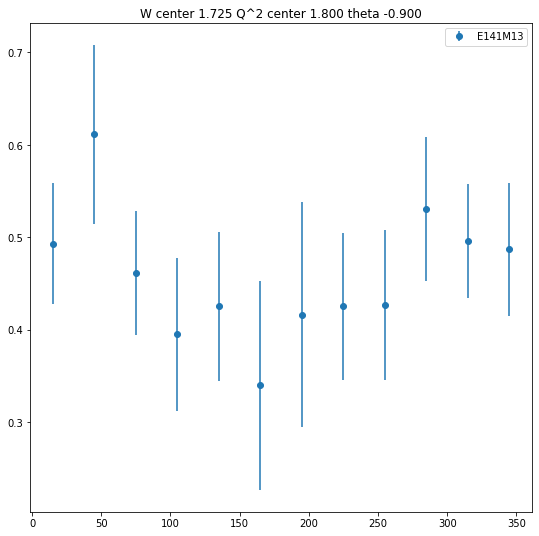

[ 0.5         0.30885834 -1.5         0.15      ]


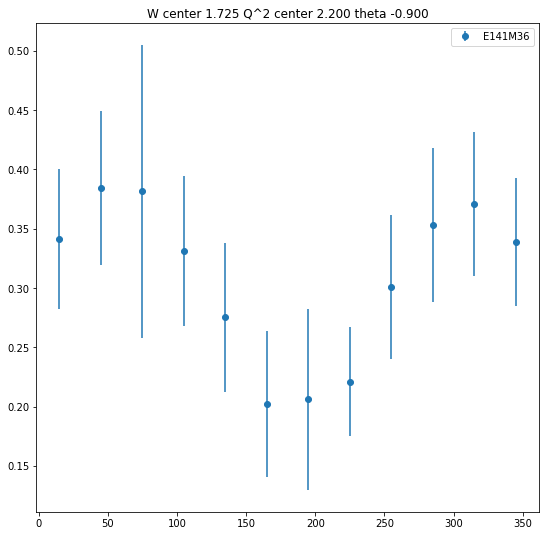

[ 0.5       0.222775 -1.5       0.15    ]


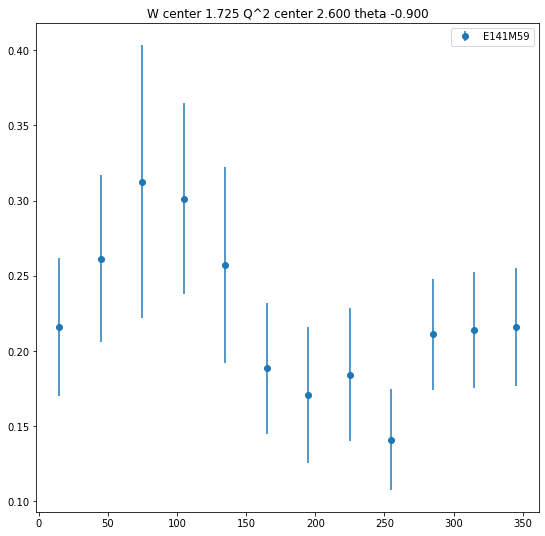

[ 0.5         0.13615455 -1.5         0.15      ]


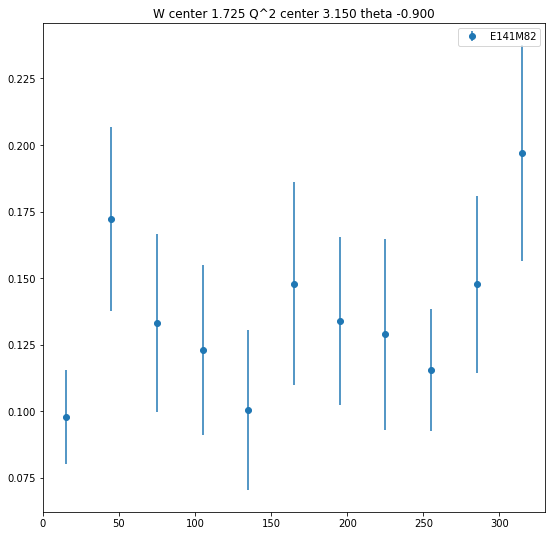

[ 0.5      0.04806 -1.5      0.15   ]


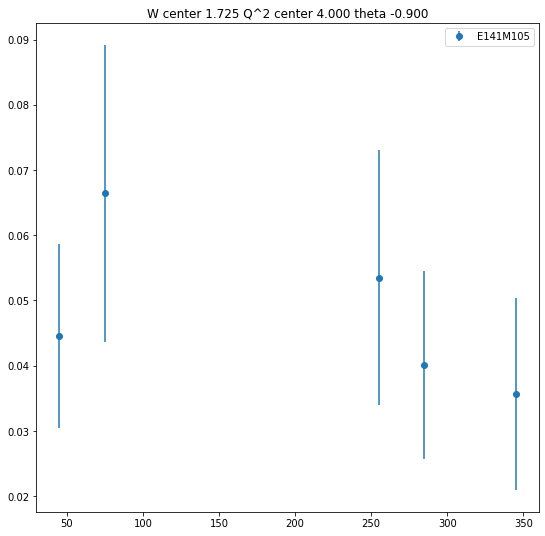

[ 0.5         0.37211668 -1.5         0.15      ]


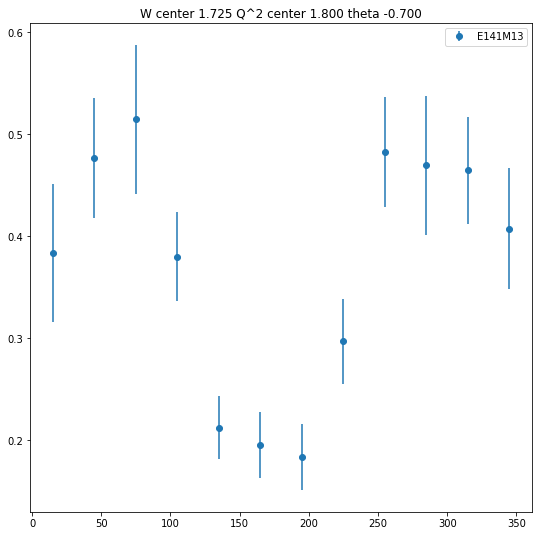

[ 0.5         0.23391666 -1.5         0.15      ]


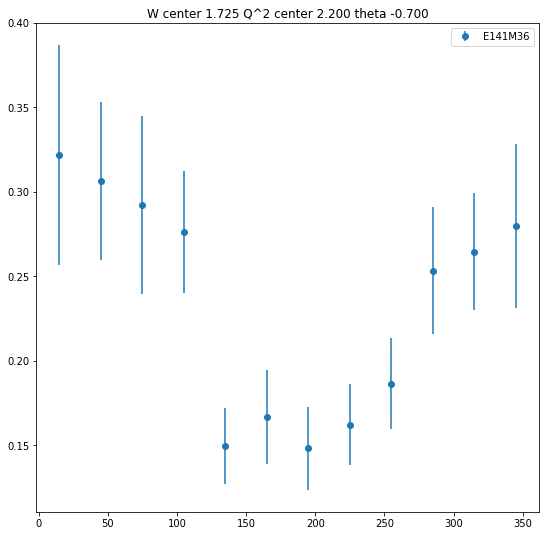

[ 0.5         0.18483333 -1.5         0.15      ]


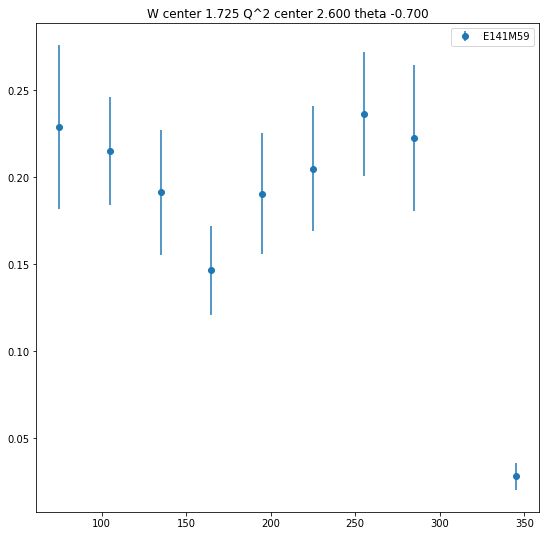

[ 0.5      0.14025 -1.5      0.15   ]


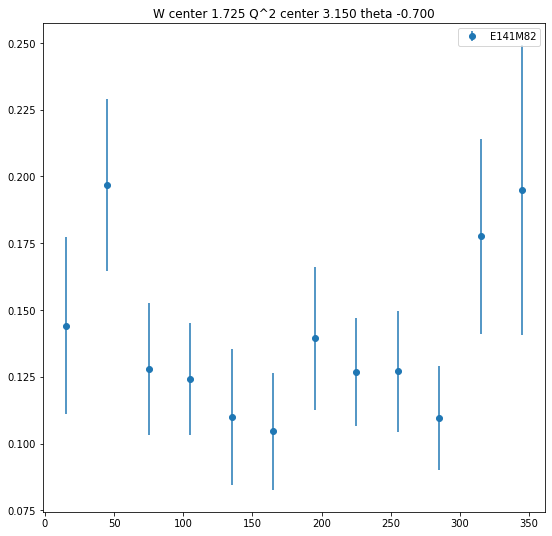

[ 0.5         2.94776654 -1.5         0.15      ]


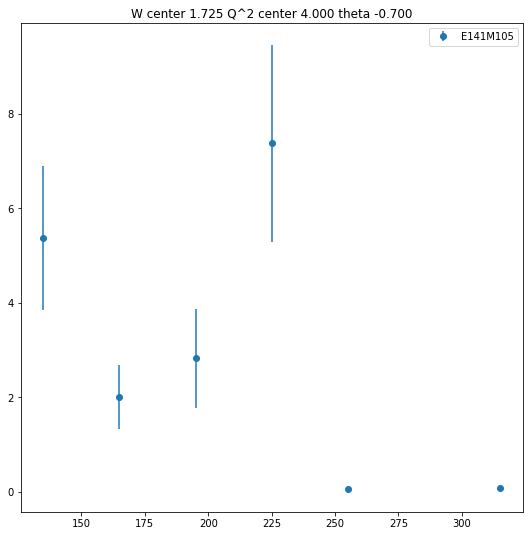

[ 0.5         0.47397497 -1.5         0.15      ]


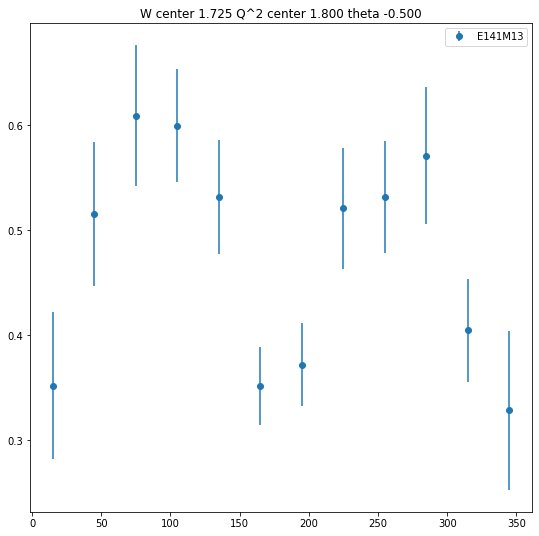

[ 0.5         0.31525001 -1.5         0.15      ]


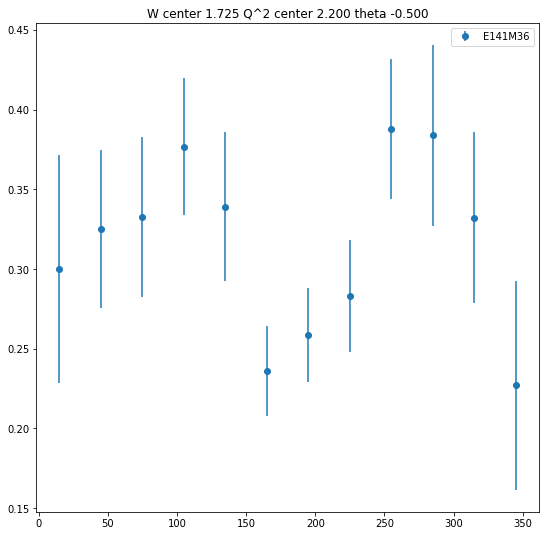

[ 0.5         0.22389999 -1.5         0.15      ]


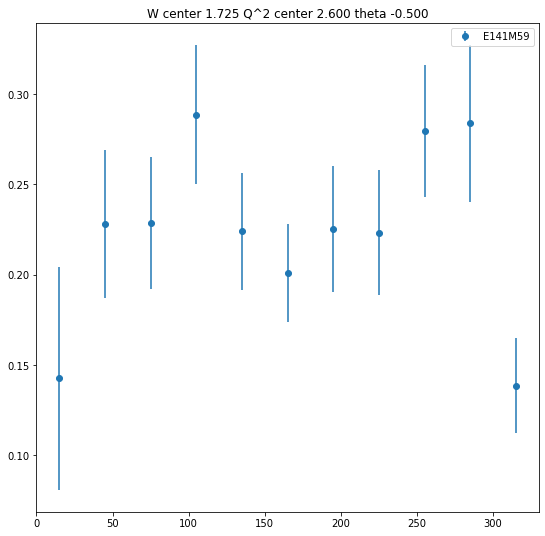

[ 0.5         0.16033001 -1.5         0.15      ]


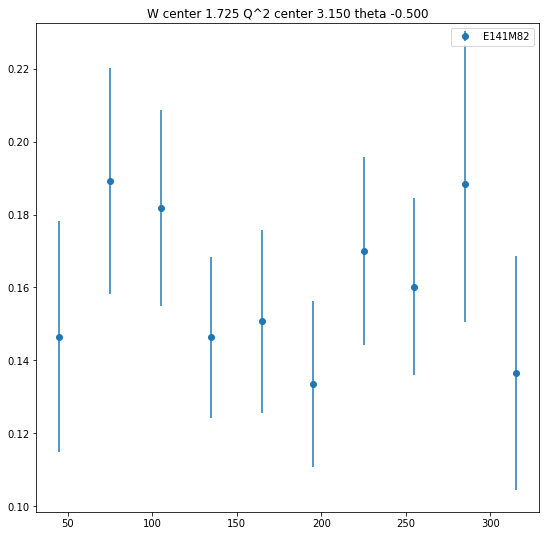

[ 0.5         0.10491112 -1.5         0.15      ]


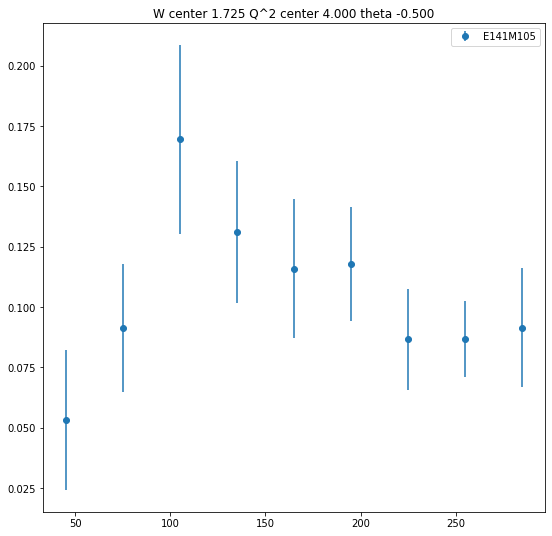

[ 0.5         0.64200914 -1.5         0.15      ]


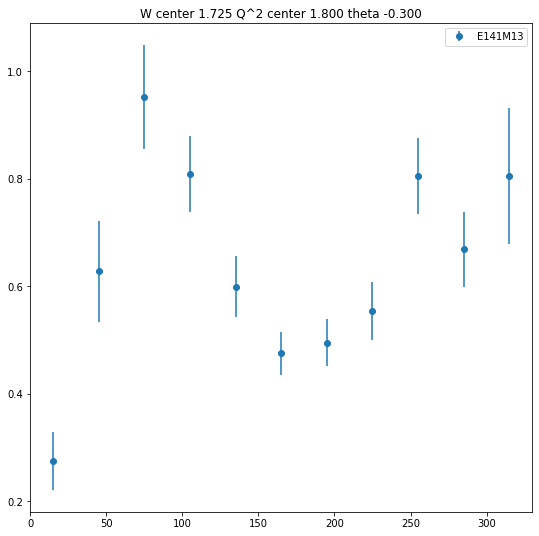

[ 0.5         0.41729999 -1.5         0.15      ]


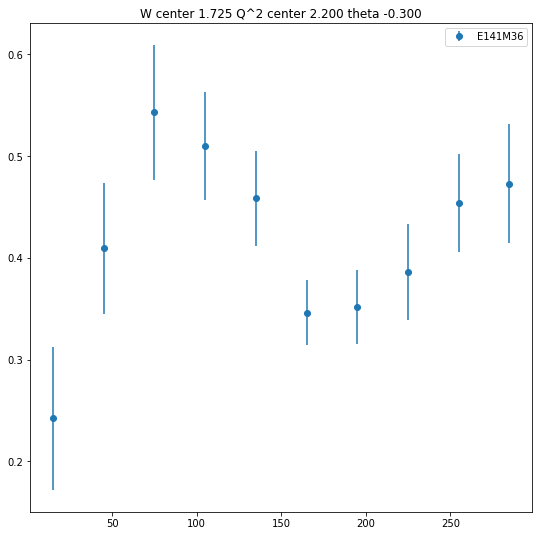

[ 0.5         0.31326002 -1.5         0.15      ]


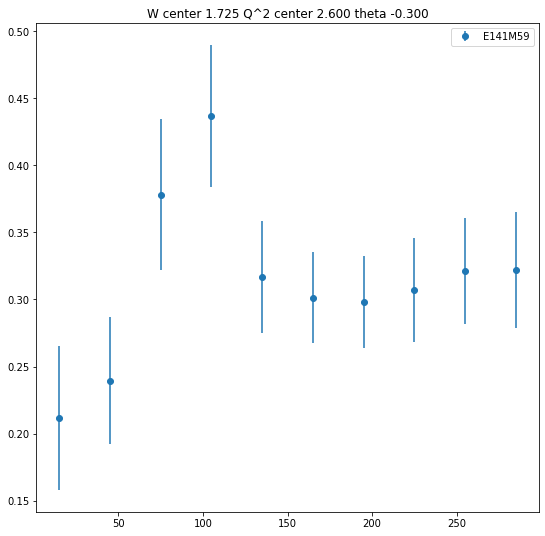

[ 0.5      0.18209 -1.5      0.15   ]


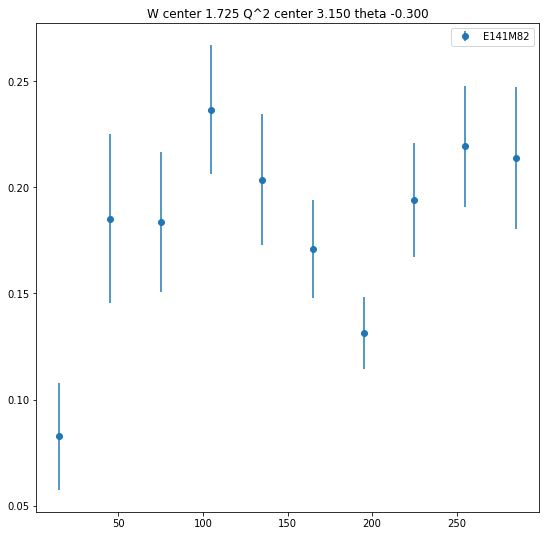

[ 0.5       0.143525 -1.5       0.15    ]


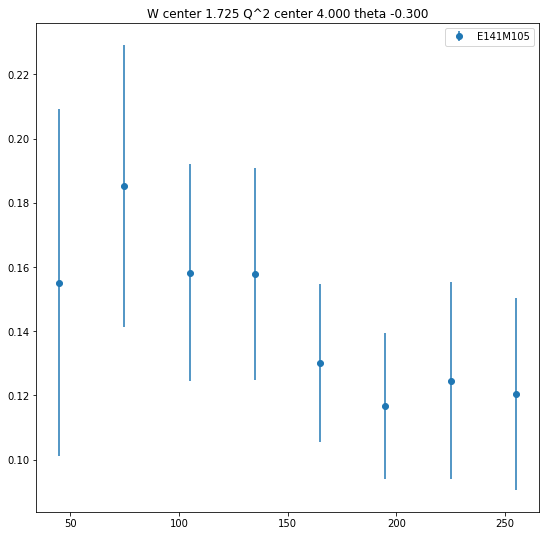

[ 0.5         0.85475004 -1.5         0.15      ]


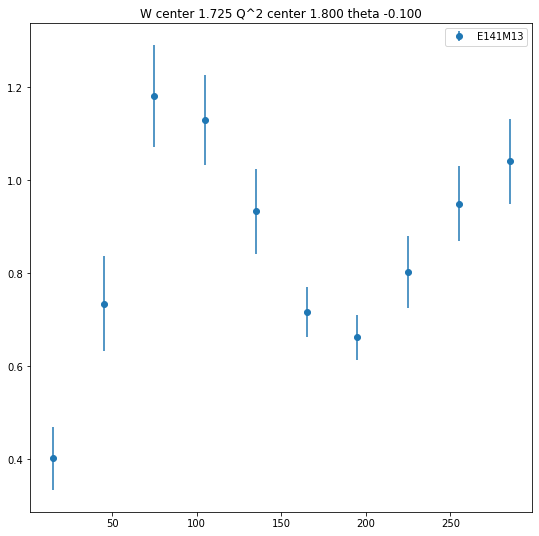

[ 0.5         0.58140993 -1.5         0.15      ]


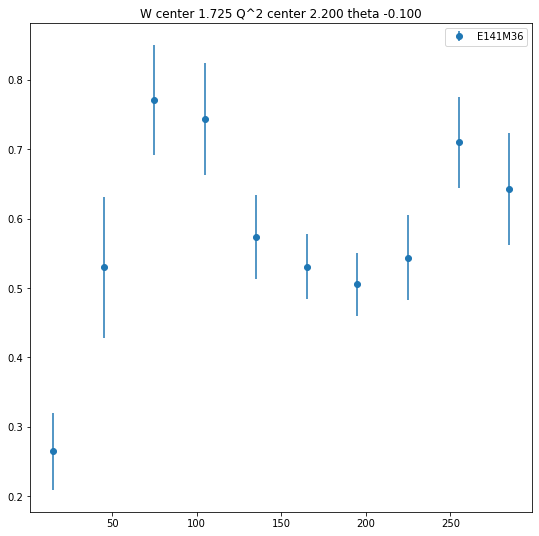

[ 0.5         0.38322726 -1.5         0.15      ]


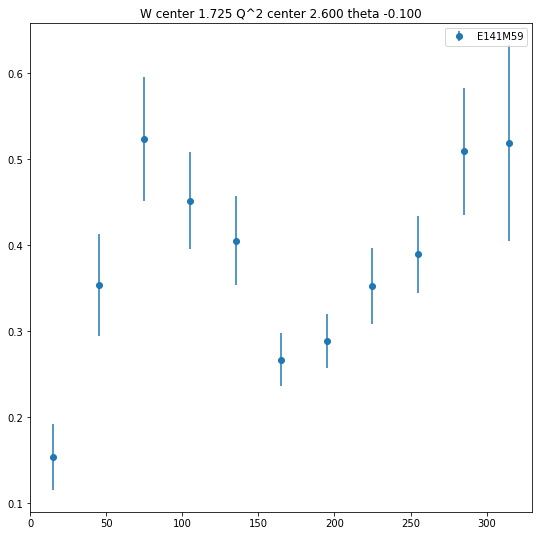

[ 0.5         0.28510001 -1.5         0.15      ]


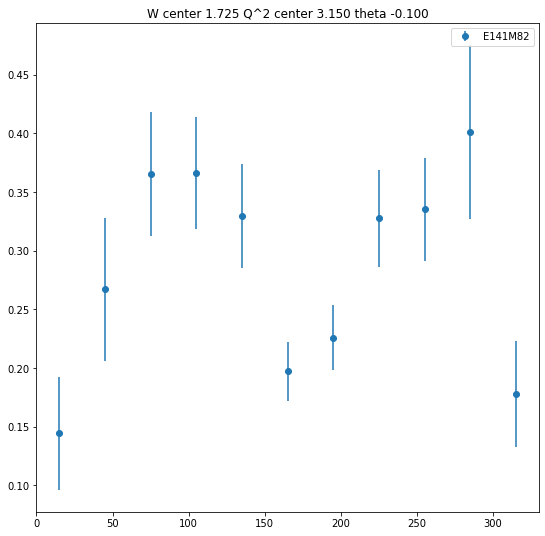

[ 0.5         0.16605556 -1.5         0.15      ]


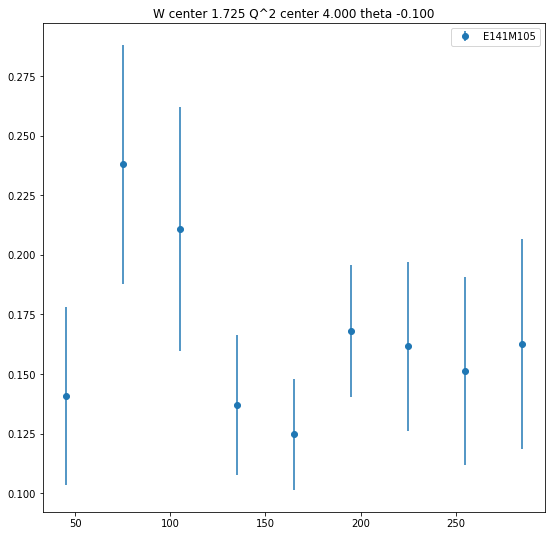

[ 0.5         0.85460001 -1.5         0.15      ]


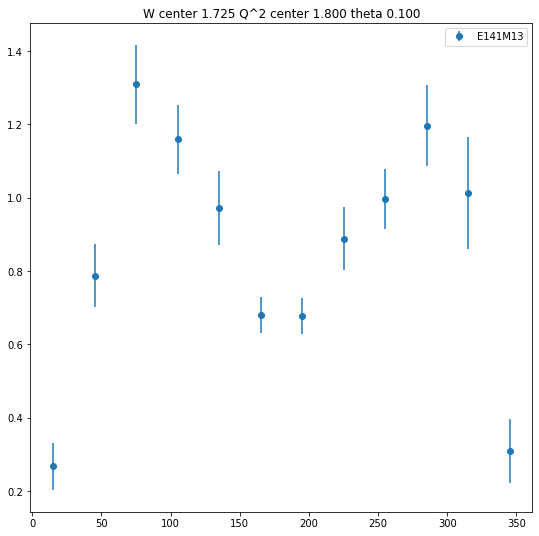

[ 0.5         0.72466666 -1.5         0.15      ]


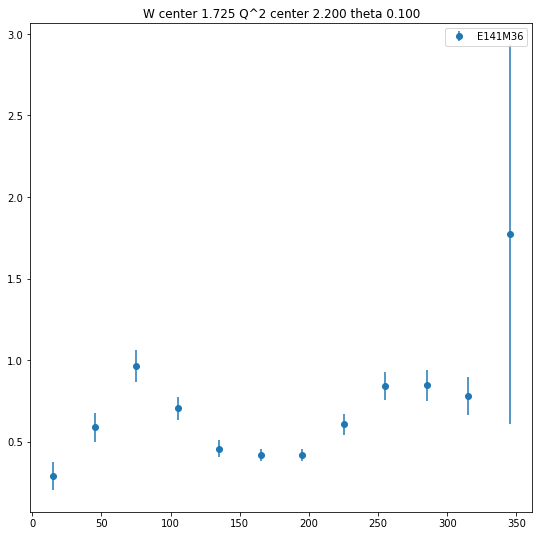

[ 0.5         0.60491818 -1.5         0.15      ]


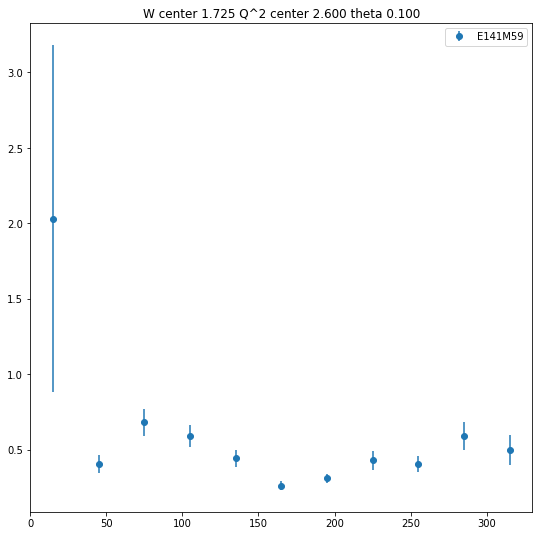

[ 0.5         0.27501002 -1.5         0.15      ]


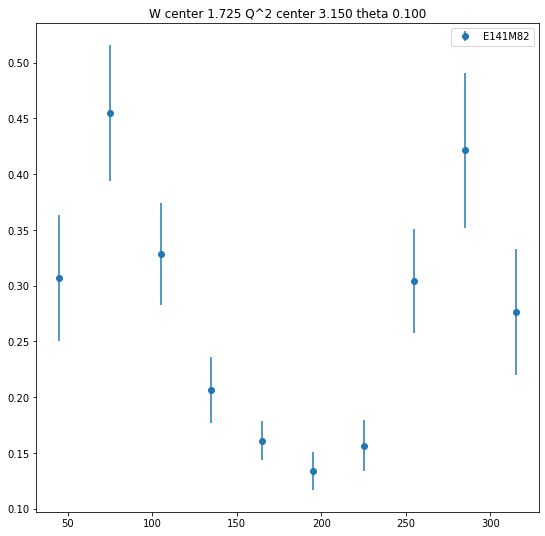

[ 0.5        0.1384111 -1.5        0.15     ]


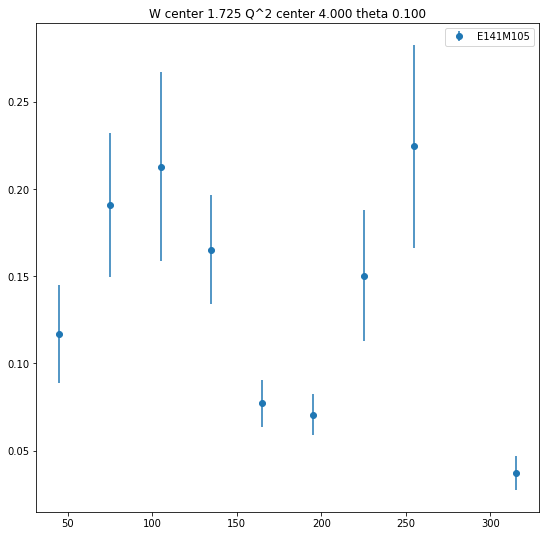

[ 0.5         0.84657282 -1.5         0.15      ]


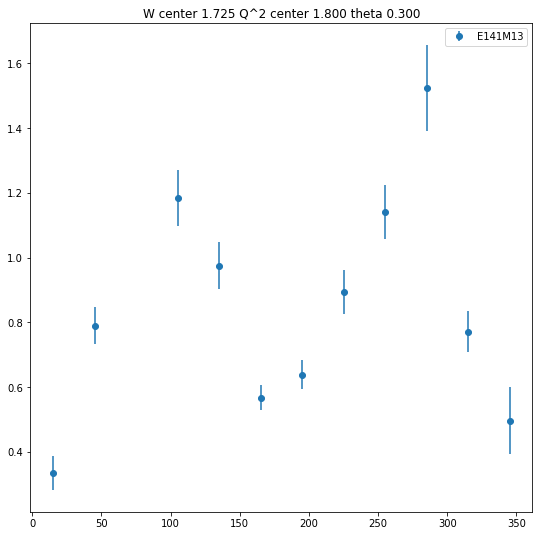

[ 0.5         0.59170002 -1.5         0.15      ]


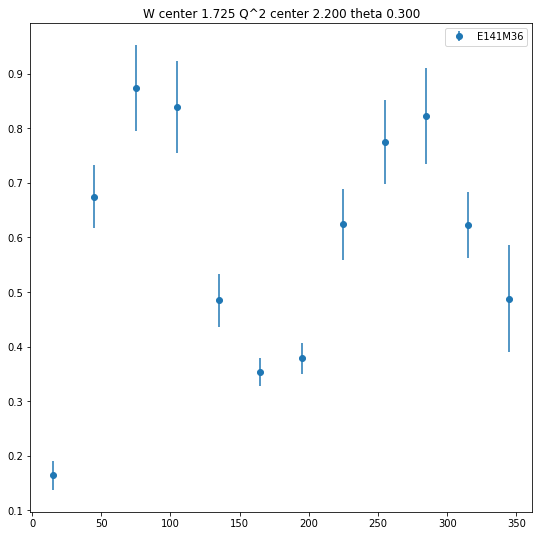

[ 0.5         0.45624998 -1.5         0.15      ]


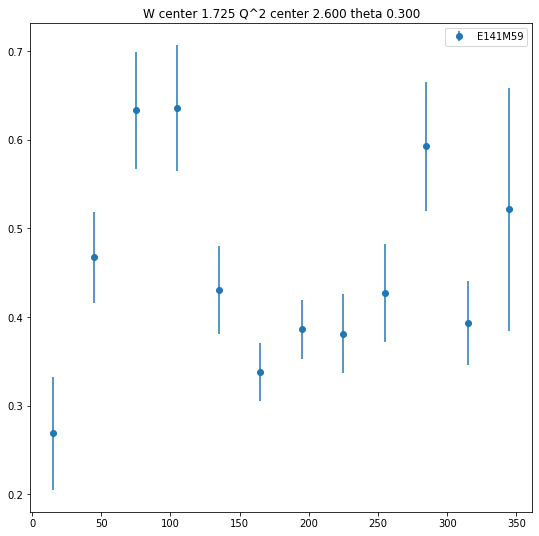

[ 0.5         0.31695455 -1.5         0.15      ]


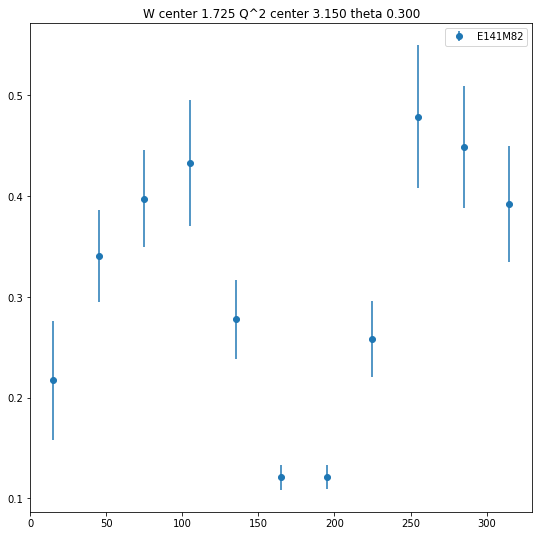

[ 0.5      0.17083 -1.5      0.15   ]


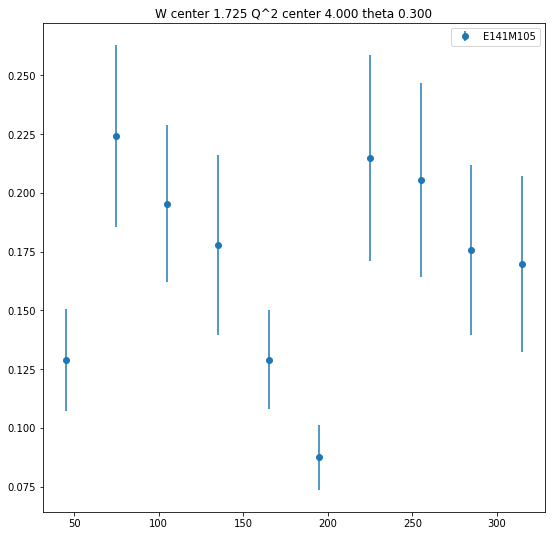

[ 0.5         0.97649997 -1.5         0.15      ]


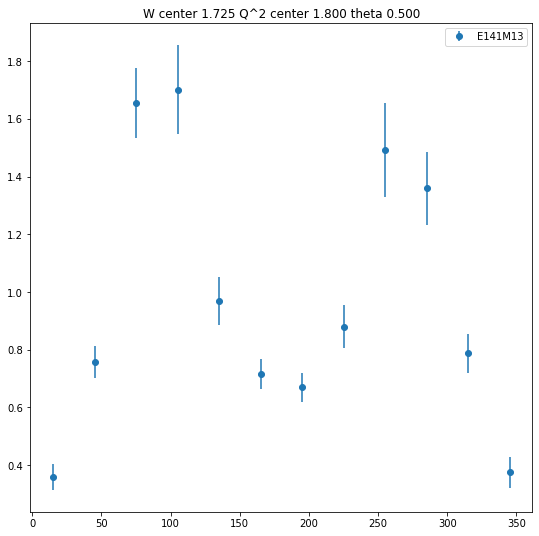

[ 0.5         0.62667501 -1.5         0.15      ]


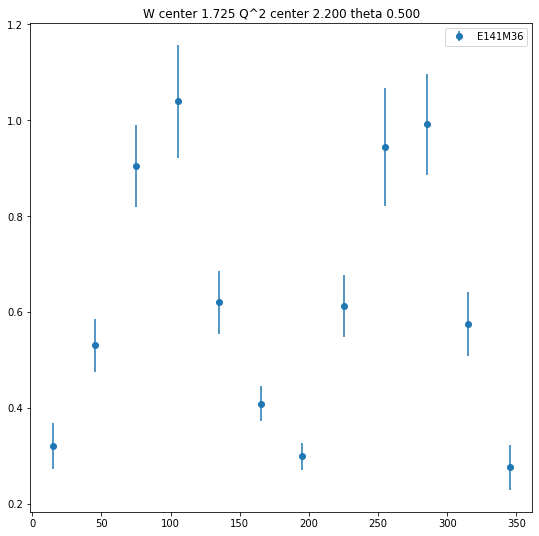

[ 0.5         0.49769166 -1.5         0.15      ]


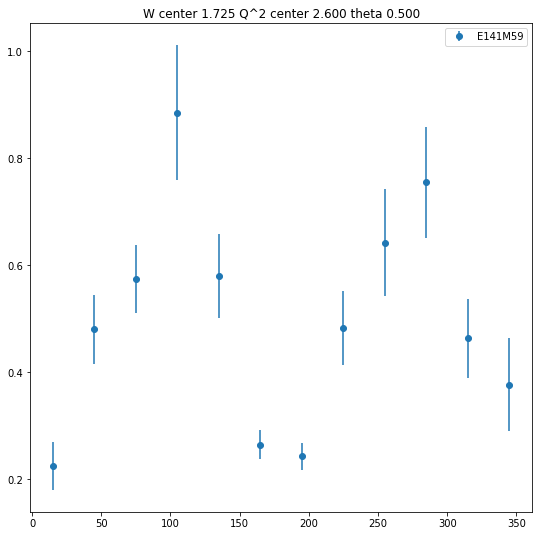

[ 0.5         0.38391671 -1.5         0.15      ]


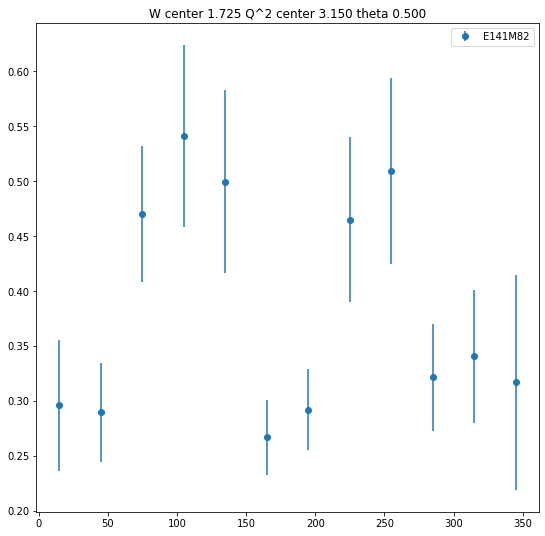

[ 0.5         0.21770911 -1.5         0.15      ]


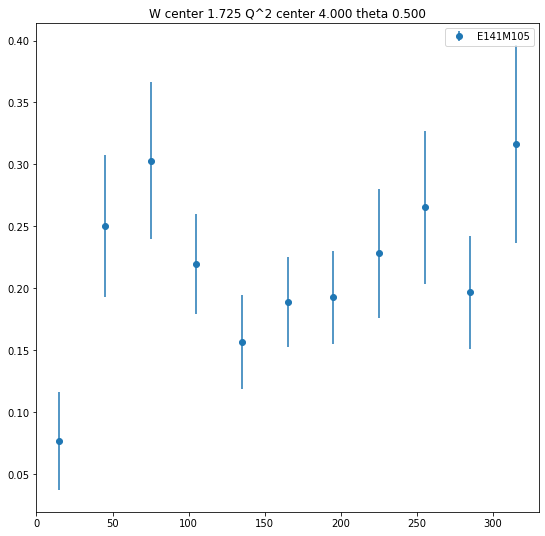

[ 0.5         1.08907497 -1.5         0.15      ]


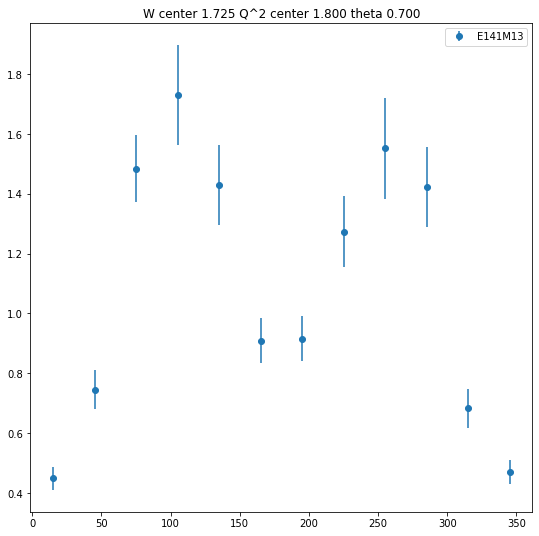

[ 0.5         0.68020004 -1.5         0.15      ]


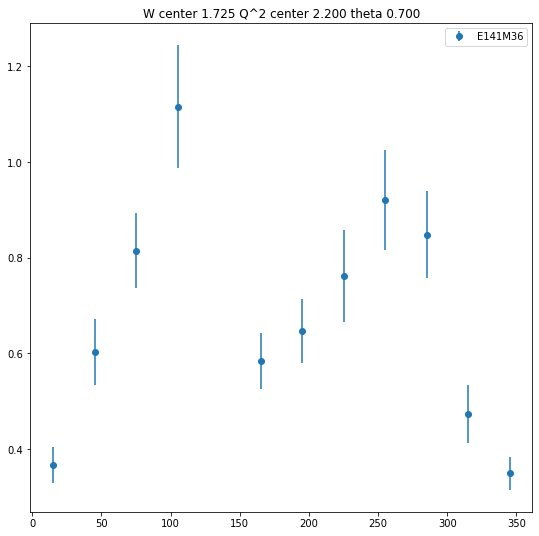

[ 0.5         0.61876673 -1.5         0.15      ]


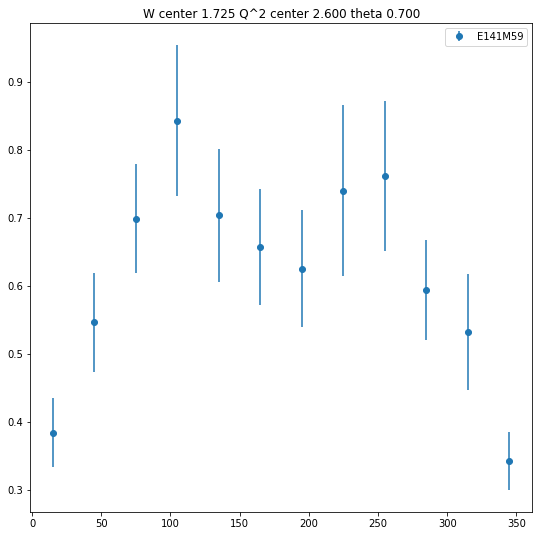

[ 0.5         0.50543338 -1.5         0.15      ]


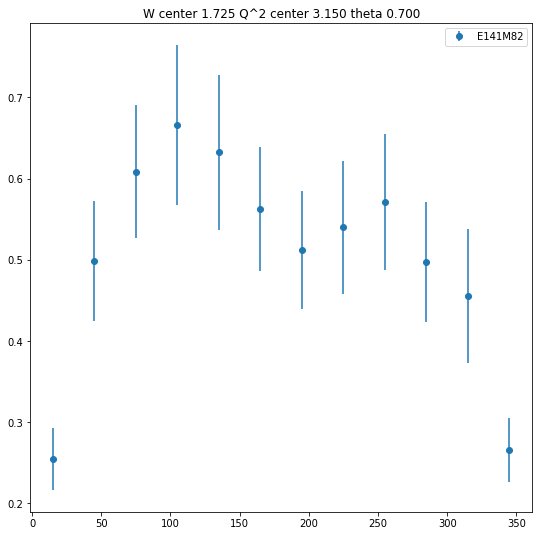

[ 0.5         0.26967499 -1.5         0.15      ]


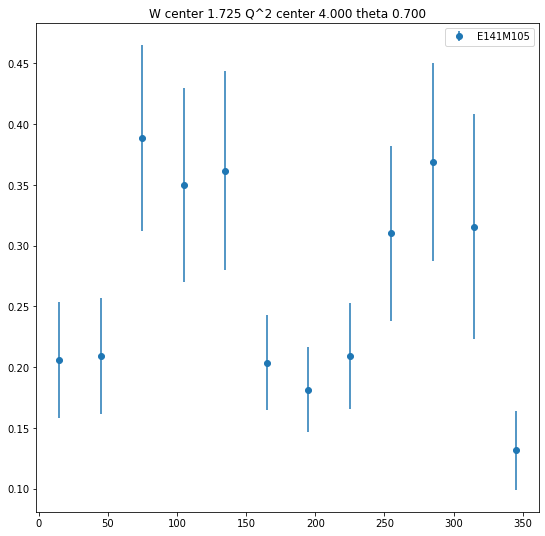

[ 0.5         1.13930833 -1.5         0.15      ]


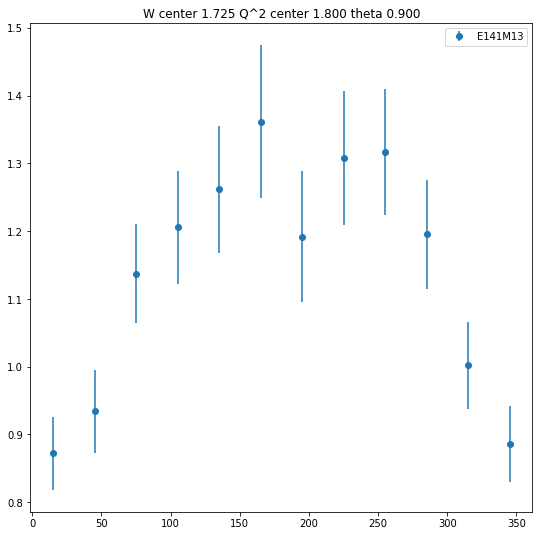

[ 0.5        0.7798667 -1.5        0.15     ]


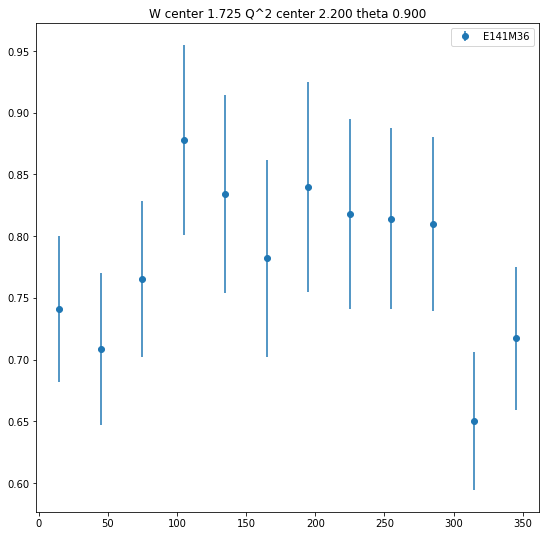

[ 0.5         0.82647496 -1.5         0.15      ]


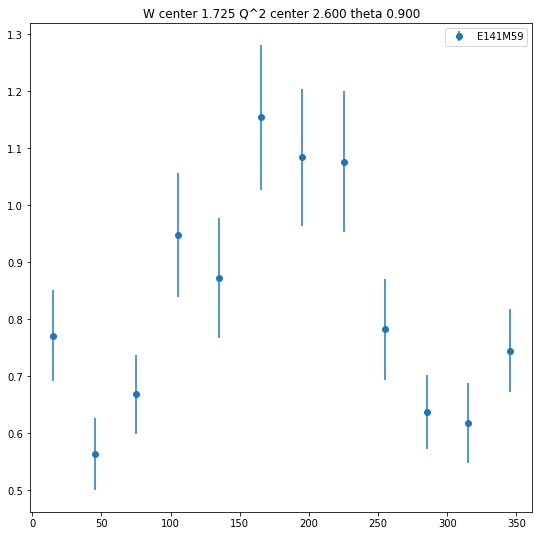

[ 0.5         0.51269168 -1.5         0.15      ]


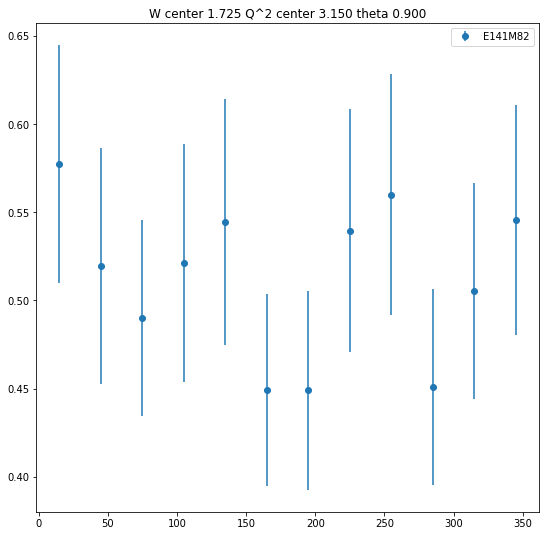

[ 0.5         0.36658335 -1.5         0.15      ]


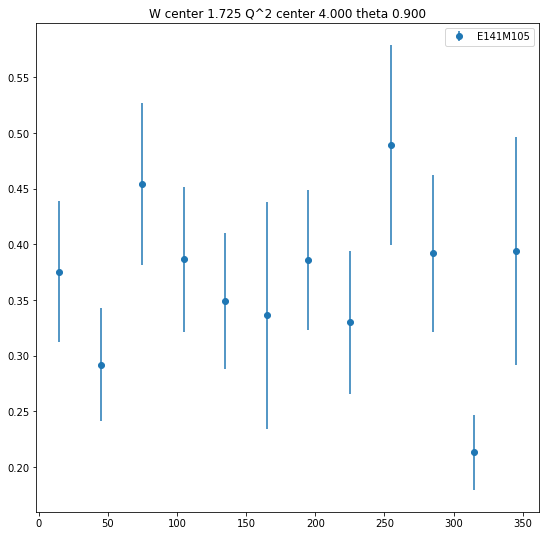

True

In [4]:
plot_cs(data)